# Comitês para classificação

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


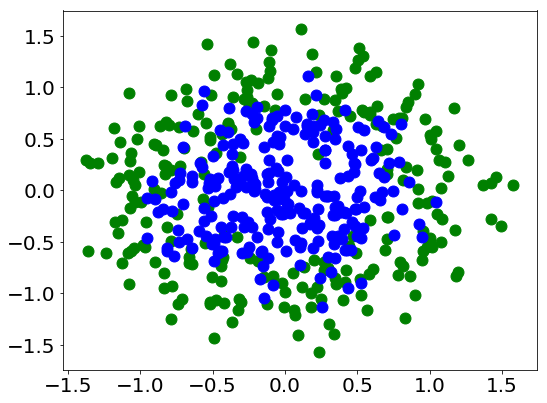

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import common as com

from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

np.random.seed(12345)

train_ratio = 0.8
validation_ratio = 0.2

#x, y = datasets.load_iris(return_X_y=True)
#x = x[:,2:4]

#x, y = datasets.make_blobs(n_samples=60, centers=3, cluster_std=3, random_state=12345)
#x, y = datasets.make_moons(n_samples=300, noise=.1, random_state=12345)
x, y = datasets.make_circles(n_samples=500, noise=0.25, factor=0.5, random_state=12345)

#data_table = pd.read_csv('data/ex2data1.txt', header=None)
#data_table = pd.read_csv('data/ex2data2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

#data_table = pd.read_csv('data/blobs2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

## Divisão treino/teste e normalização dos dados

Número de padrões de treinamento: 401
Número de padrões de teste: 99


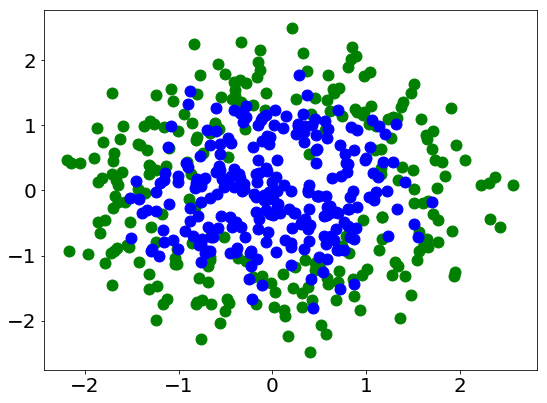

In [3]:
normalize_data = True

np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(train_index))
print("Número de padrões de teste: %d" % len(test_index))

if normalize_data:

    x_train_mean = np.mean(x_train, axis=0)
    x_train = x_train - x_train_mean
    x_train_std = np.std(x_train, axis=0)
    x_train /= x_train_std

    x_test = (x_test - x_train_mean) / x_train_std

    x = (x - x_train_mean) / x_train_std
    
    fig = plt.figure(figsize=com.figsize)
    plot_data(x, y)
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

## Solução via Bagging

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


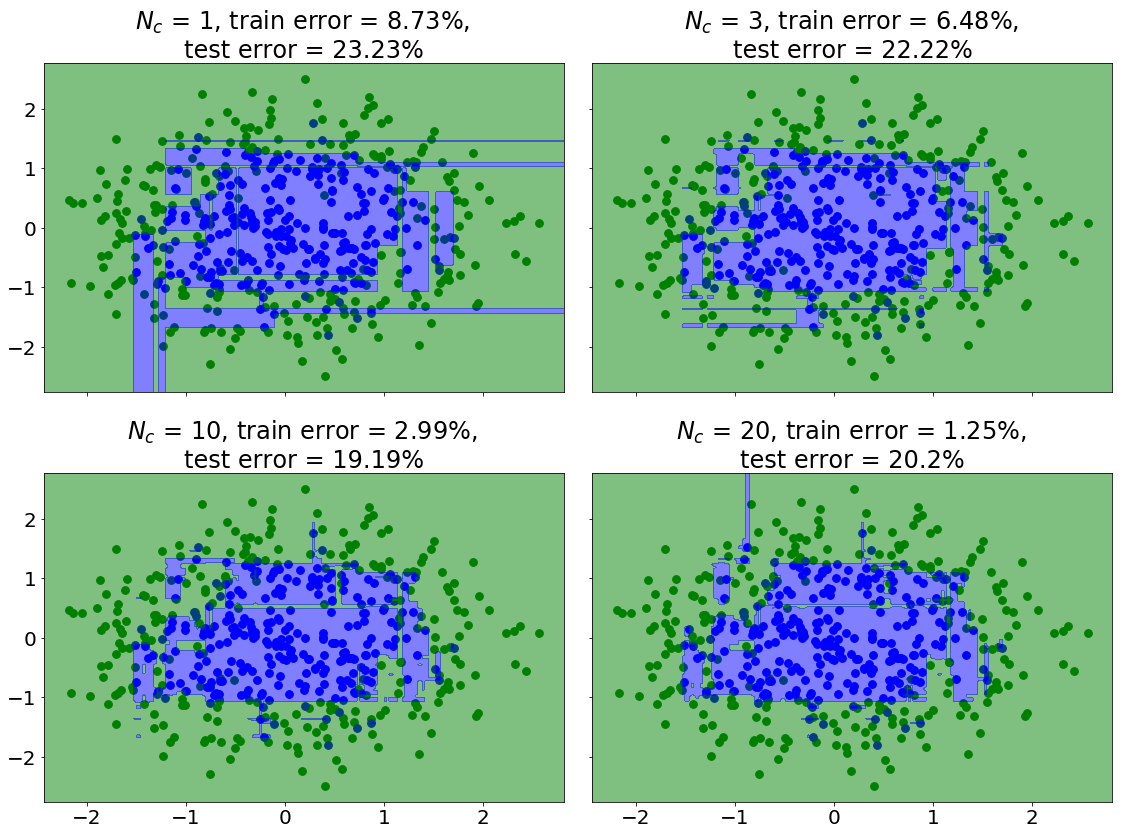

In [7]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

n_estimators_list = [1, 3, 10, 20]

for i, n_estimators in enumerate(n_estimators_list):
    
#     base_classifier = KNeighborsClassifier(n_neighbors=3)
    base_classifier = DecisionTreeClassifier()
    model = BaggingClassifier(base_classifier, n_estimators=n_estimators,
                              max_samples=1.0, n_jobs=-1, random_state=12345)

    model.fit(x_train, y_train) 
    
    train_error = np.round(100*np.mean(y_train != model.predict(x_train)), 2)
    test_error = np.round(100*np.mean(y_test != model.predict(x_test)), 2)
   
    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(labels):
        axs.flatten()[i].scatter(x[y == label,0], x[y == label,1],
                        s=5*com.markersize, marker='o', color=colors[j])  
    xx, yy = com.make_meshgrid(x[:,0], x[:,1])
    com.plot_contours(axs.flatten()[i], model,
                      lambda x, model: model.predict(x),
                      xx, yy, colors)
    axs.flatten()[i].set_title("$N_c$ = " + str(n_estimators) + 
                               ", train error = " + str(train_error) + "%, \n" +
                               "test error = " + str(test_error) + "%")
#plt.savefig('knn_bagging', dpi=com.dpi)

## Solução via Random Forest

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


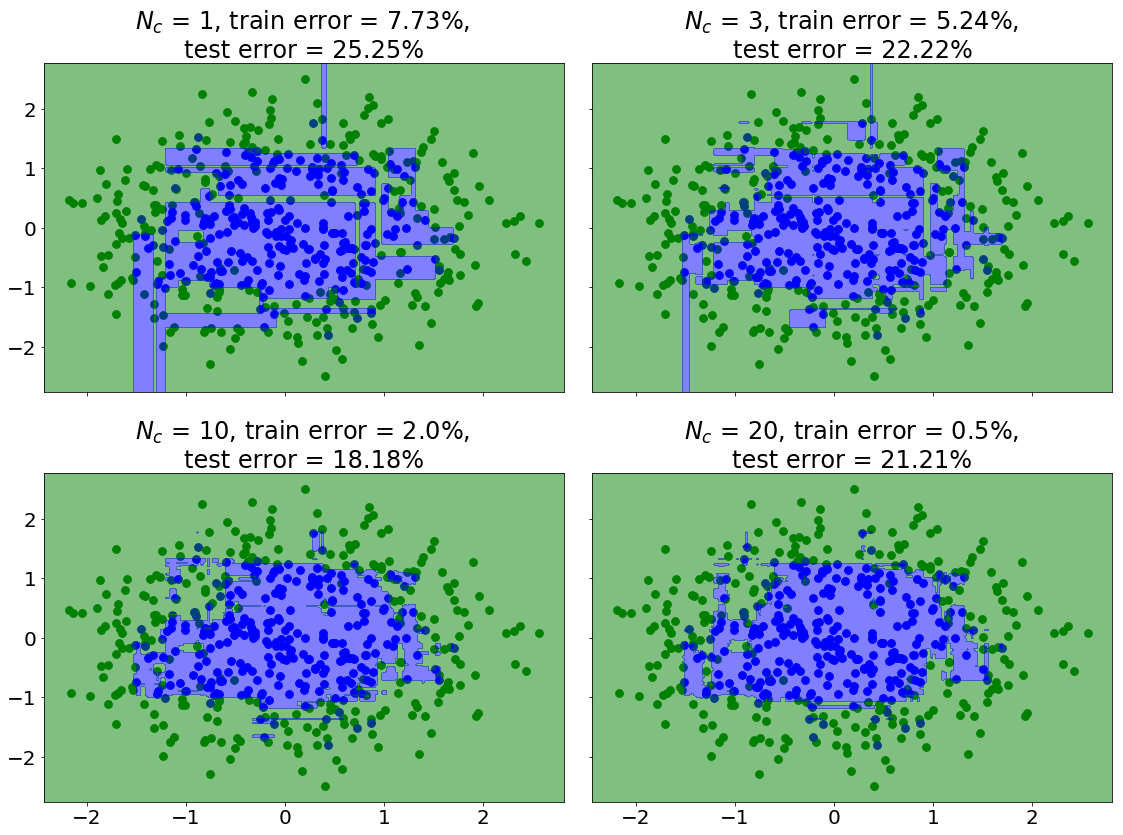

In [5]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

n_estimators_list = [1, 3, 10, 20]

for i, n_estimators in enumerate(n_estimators_list):
    
    model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, random_state=12345)

    model.fit(x_train, y_train) 
    
    train_error = np.round(100*np.mean(y_train != model.predict(x_train)), 2)
    test_error = np.round(100*np.mean(y_test != model.predict(x_test)), 2)
   
    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(labels):
        axs.flatten()[i].scatter(x[y == label,0], x[y == label,1],
                        s=5*com.markersize, marker='o', color=colors[j])  
    xx, yy = com.make_meshgrid(x[:,0], x[:,1])
    com.plot_contours(axs.flatten()[i], model,
                      lambda x, model: model.predict(x),
                      xx, yy, colors)
    axs.flatten()[i].set_title("$N_c$ = " + str(n_estimators) + 
                               ", train error = " + str(train_error) + "%, \n" +
                               "test error = " + str(test_error) + "%")
#plt.savefig('random_forest', dpi=com.dpi)

## Solução via AdaBoost

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


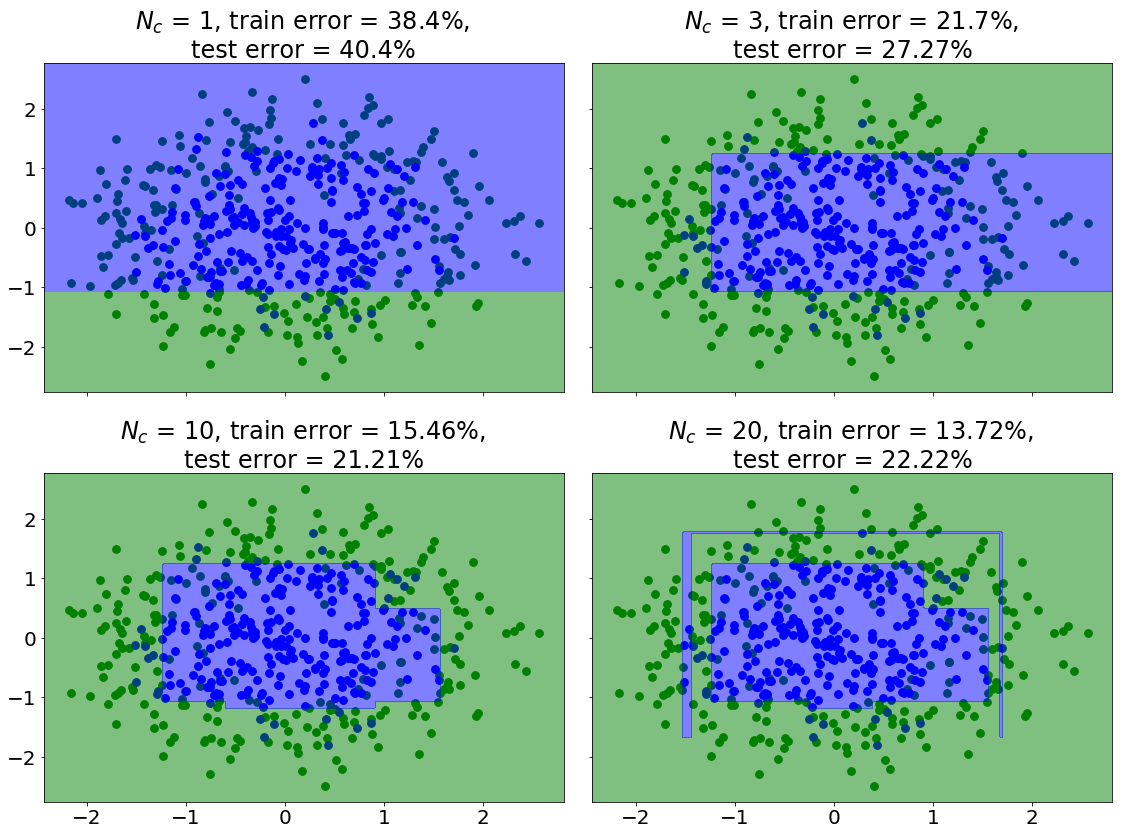

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

n_estimators_list = [1, 3, 10, 20]

for i, n_estimators in enumerate(n_estimators_list):
    
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=n_estimators, random_state=12345)

    model.fit(x_train, y_train) 
    
    train_error = np.round(100*np.mean(y_train != model.predict(x_train)), 2)
    test_error = np.round(100*np.mean(y_test != model.predict(x_test)), 2)
   
    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(labels):
        axs.flatten()[i].scatter(x[y == label,0], x[y == label,1],
                        s=5*com.markersize, marker='o', color=colors[j])  
    xx, yy = com.make_meshgrid(x[:,0], x[:,1])
    com.plot_contours(axs.flatten()[i], model,
                      lambda x, model: model.predict(x),
                      xx, yy, colors)
    axs.flatten()[i].set_title("$N_c$ = " + str(n_estimators) + 
                               ", train error = " + str(train_error) + "%, \n" +
                               "test error = " + str(test_error) + "%")
#plt.savefig('adaboost', dpi=com.dpi)